In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
advert = pd.read_csv(r'advertising.csv')
#Fetching the first few records of the data.
advert.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


In [3]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [4]:
advert.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [5]:
advert['Clicked on Ad'].value_counts()

1    500
0    500
Name: Clicked on Ad, dtype: int64

In [6]:
advert['Male'].value_counts()

0    519
1    481
Name: Male, dtype: int64

In [7]:
advert.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [8]:
#EDA
advert.groupby('Clicked on Ad').mean()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
Clicked on Ad,,,,,
0,76.85462,31.684,61385.58642,214.51374,0.500
1,53.14578,40.334,48614.41374,145.48646,0.462


In [9]:
advert.groupby(['Clicked on Ad','Male']).size()

Clicked on Ad  Male
0              0       250
               1       250
1              0       269
               1       231
dtype: int64

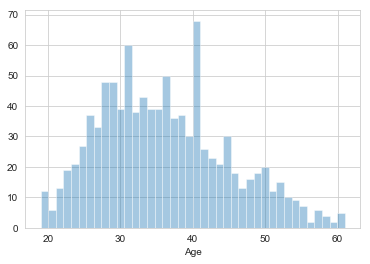

In [10]:
sns.set_style('whitegrid')
sns.distplot(advert['Age'], kde = False, bins = 40)

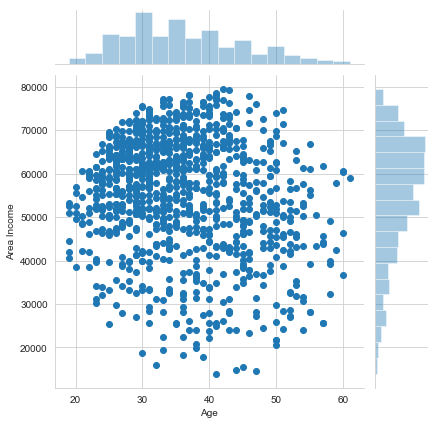

In [11]:
sns.jointplot(x = 'Age', y = 'Area Income', data = advert)
plt.show()

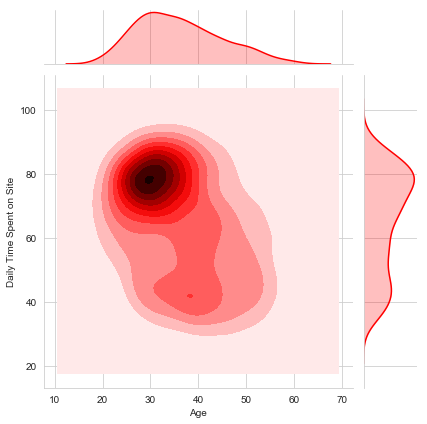

In [12]:
sns.jointplot(x =  'Age', y ='Daily Time Spent on Site', data = advert, kind = 'kde', color = 'red')
plt.show()

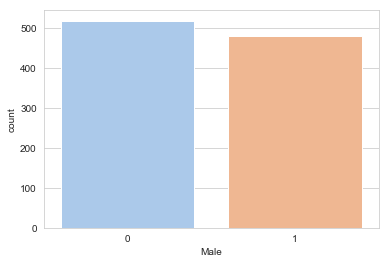

In [13]:
sns.countplot(x = 'Male',  data = advert, palette= 'pastel')


In [16]:
#Logistic Regression

X = advert[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']]
y = advert['Clicked on Ad']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.linear_model import LogisticRegression
#Creating an instance of Logistic Regression class
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


prediction = logreg.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix
conf_Matrix = confusion_matrix(y_test, prediction)
print(conf_Matrix)

[[86  3]
 [17 94]]


In [21]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
print(classification_report(y_test,prediction))
result2 = accuracy_score(y_test,prediction)
print("Accuracy:",result2)

             precision    recall  f1-score   support

          0       0.83      0.97      0.90        89
          1       0.97      0.85      0.90       111

avg / total       0.91      0.90      0.90       200

Accuracy: 0.9
